In [1]:
# Create gender model

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization


In [2]:
#Load gender_model.h5 model and test it

#To load a model from a file, use the load_model() function. This function is defined in the keras.models module.

from keras.models import Model, load_model
# load model
model = load_model('gender_model2.h5', compile=False, custom_objects=None)


# summarize model.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)       

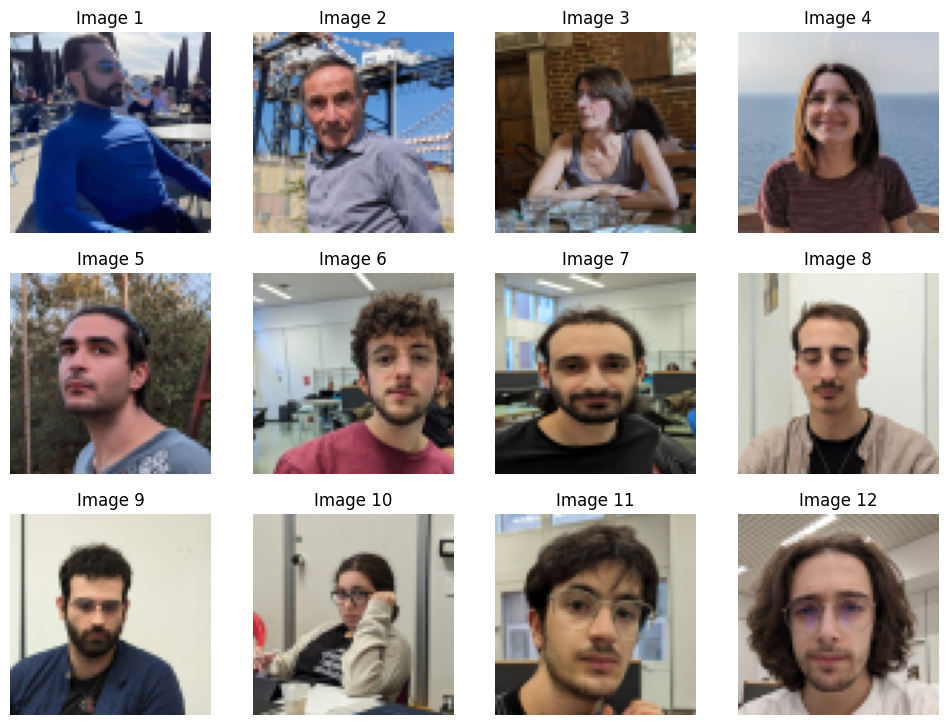

In [10]:
#Use opencv to read image and resize it to 48x48 pixels
#read all imags inside test folder
images = []

for img in os.listdir("TestImages"):
    img = cv2.imread(os.path.join("TestImages",img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #Normalize the image
    img = img/255.0
    #Resize the image, so that all images have same size
    img = cv2.resize(img, (50,50), interpolation = cv2.INTER_AREA)
    images.append(img)

#Show all images in a 3x3 grid
fig = plt.figure(figsize=(12,12))
for i in range(images.__len__()):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i])
    plt.title("Image "+str(i+1))
    plt.axis("off")


1/1 [==============================] - 0s 362ms/step
[[0.19881172]
 [0.02239581]
 [0.01256862]
 [0.02097512]
 [0.05171828]
 [0.04523413]
 [0.01784483]
 [0.00388306]
 [0.01242389]
 [0.00962505]
 [0.00494432]
 [0.00078311]
 [0.00740911]
 [0.02022186]
 [0.00361176]
 [0.00027179]]
1/1 [==============================] - 0s 28ms/step
[[5.7051471e-05]
 [5.2591102e-05]
 [2.2494679e-04]
 [2.9821809e-02]
 [7.7776403e-06]
 [1.0156428e-05]
 [2.0416596e-04]
 [1.1210100e-01]
 [8.8997763e-03]
 [1.0645452e-03]
 [7.1543560e-04]
 [1.6313937e-02]
 [8.4608102e-01]
 [4.1707841e-01]
 [3.4192786e-02]
 [1.3539700e-02]]
1/1 [==============================] - 0s 26ms/step
[[0.7676117 ]
 [0.66312426]
 [0.59173477]
 [0.01984434]
 [0.94370735]
 [0.99507046]
 [0.99504906]
 [0.37755236]
 [0.96658474]
 [0.9866507 ]
 [0.9622336 ]
 [0.35908997]
 [0.97068495]
 [0.9466646 ]
 [0.659124  ]
 [0.22162594]]
1/1 [==============================] - 0s 27ms/step
[[0.9788383 ]
 [0.99936384]
 [0.9990752 ]
 [0.9973828 ]
 [0.9966607 

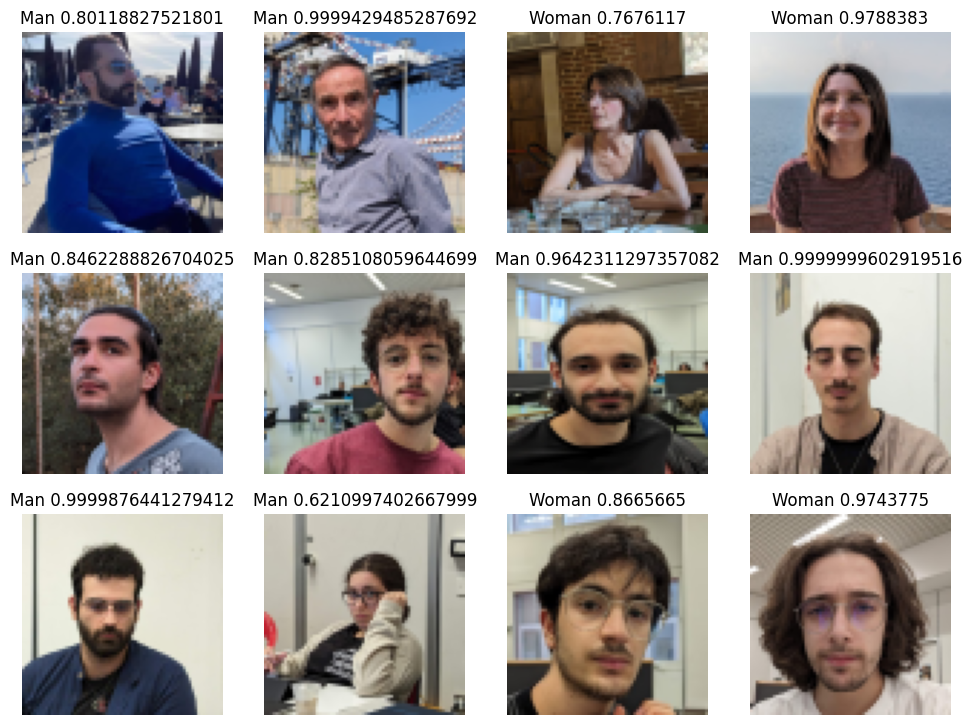

In [11]:
#Knowing is a binary classifier, print woman or man baseds on the prediction
preds = []
for image in images:
    pred = model.predict(np.expand_dims(image, axis=0))
    label = ""
    print(pred)
    if pred[0][0] > 0.5:
        label="Woman "+str(pred[0][0])
    else:
        label="Man "+str(1-pred[0][0])

    preds.append(label)
    
#Show the images with the prediction
fig = plt.figure(figsize=(12,12))

for i in range(images.__len__()):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i])
    plt.title(preds[i])
    plt.axis("off")

plt.show()



In [12]:
#Test age model 
age_model = load_model(filepath="age_model (1).h5", compile=False)

# Test model on images
age_preds = []

for image in images:
    #Will return an int
    pred = age_model.predict(np.expand_dims(image, axis=0))
    print(pred)
    #Convert int to strin
    label = f"{int(pred[0][0])} years"
    age_preds.append(label)

#Show the images with the prediction
fig = plt.figure(figsize=(12,12))

for i in range(images.__len__()):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i])
    plt.title(age_preds[i])
    plt.axis("off")

plt.show()


ValueError: in user code:

    File "c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 50, 50, 3), found shape=(None, 70, 70, 3)
